Importing the basic necessary libraries of scikit-image, numpy and matplotlib's pyplot.

In [3]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

### 1. Edge Detection using Roberts, Sobel and Prewitt Operators

Edge operators are used in image processing within edge detection algorithms. They are discrete differentiation operators, computing an approximation of the gradient of the image intensity function.
Different operators compute different finite-difference approximations of the gradient.


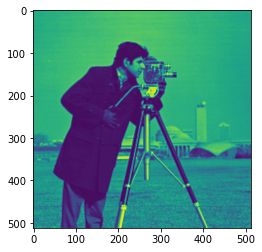

In [4]:
from skimage import filters
from skimage.data import camera
from skimage.util import compare_images

image = camera()   #from skimage library
plt.imshow(image)

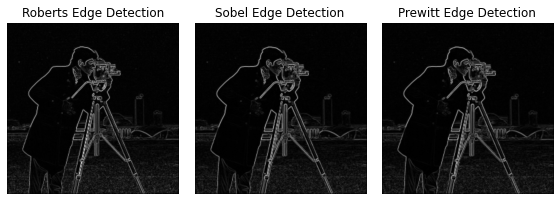

In [5]:
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)
edge_prewitt = filters.prewitt(image)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True,
                         figsize=(8, 8))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

axes[2].imshow(edge_prewitt, cmap=plt.cm.gray)
axes[2].set_title('Prewitt Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

### 2. Canny Edge Detection
The Canny filter is a multi-stage edge detector. It uses a filter based on the derivative of a Gaussian in order to compute the intensity of the gradients.The Gaussian reduces the effect of noise present in the image. Then, potential edges are thinned down to 1-pixel curves by removing non-maximum pixels of the gradient magnitude. Finally, edge pixels are kept or removed using hysteresis thresholding on the gradient magnitude.

The Canny has three adjustable parameters: the width of the Gaussian (the noisier the image, the greater the width), and the low and high threshold for the hysteresis thresholding.

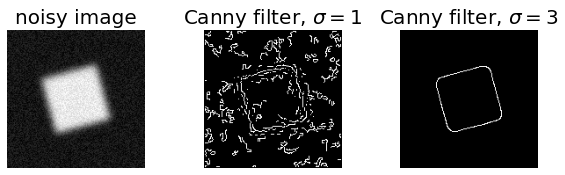

In [7]:
from scipy import ndimage as ndi
from skimage import feature


# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title(r'Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

### 3. Thresholding
Thresholding is used to create a binary image from a grayscale image. It is the simplest way to segment objects from a background.

Thresholding algorithms implemented in scikit-image can be separated in two categories:

1. Histogram-based. The histogram of the pixels’ intensity is used and certain assumptions are made on the properties of this histogram (e.g. bimodal).
2. Local. To process a pixel, only the neighboring pixels are used. These algorithms often require more computation time.

If you are not familiar with the details of the different algorithms and the underlying assumptions, it is often difficult to know which algorithm will give the best results. Therefore, Scikit-image includes a function to evaluate thresholding algorithms provided by the library. At a glance, you can select the best algorithm for you data without a deep understanding of their mechanisms.

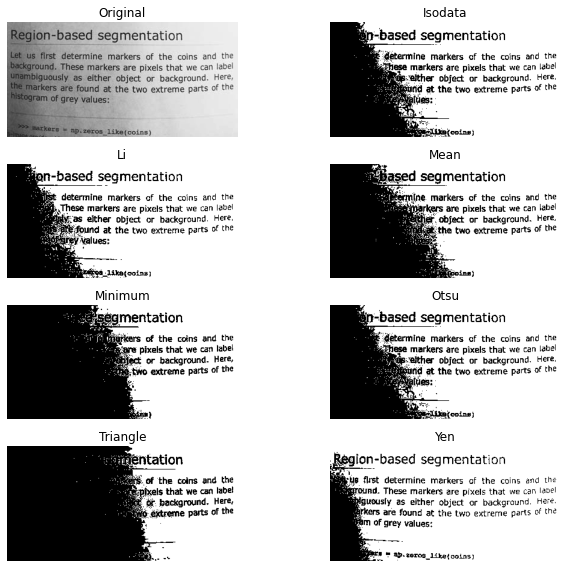

In [8]:
from skimage import data
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

Now, we illustrate how to apply one of these thresholding algorithms. This example uses the mean value of pixel intensities. It is a simple and naive threshold value, which is sometimes used as a guess value

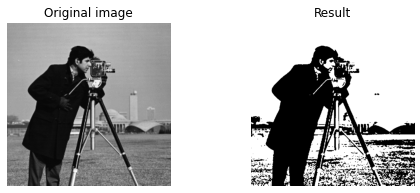

In [9]:
from skimage.filters import threshold_mean


image = data.camera()
thresh = threshold_mean(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')

for a in ax:
    a.axis('off')

plt.show()

#### Bimodal Histogram

For pictures with a bimodal histogram, more specific algorithms can be used. For instance, the minimum algorithm takes a histogram of the image and smooths it repeatedly until there are only two peaks in the histogram.

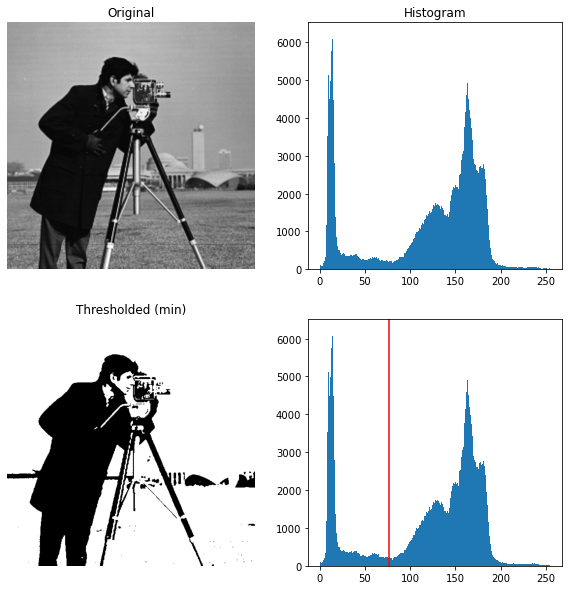

In [10]:
from skimage.filters import threshold_minimum


image = data.camera()

thresh_min = threshold_minimum(image)
binary_min = image > thresh_min

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(image, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(image.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

ax[1, 0].imshow(binary_min, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (min)')

ax[1, 1].hist(image.ravel(), bins=256)
ax[1, 1].axvline(thresh_min, color='r')

for a in ax[:, 0]:
    a.axis('off')
plt.show()

#### Otsu's Thresholding

Otsu’s method calculates an “optimal” threshold (marked by a red line in the histogram below) by maximizing the variance between two classes of pixels, which are separated by the threshold. Equivalently, this threshold minimizes the intra-class variance"

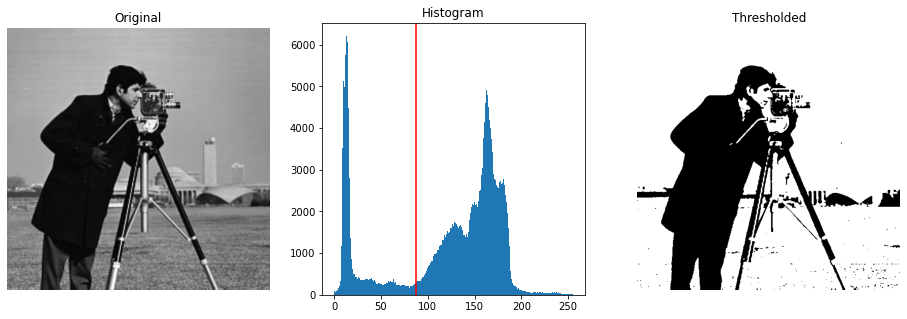

In [17]:
from skimage.filters import threshold_otsu


image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(16, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

#### Local Thresholding
If the image background is relatively uniform, then you can use a global threshold value as presented above. However, if there is large variation in the background intensity, adaptive thresholding (a.k.a. local or dynamic thresholding) may produce better results. Note that local is much slower than global thresholding.

Here, we binarize an image using the threshold_local function, which calculates thresholds in regions with a characteristic size block_size surrounding each pixel (i.e. local neighborhoods). Each threshold value is the weighted mean of the local neighborhood minus an offset value.

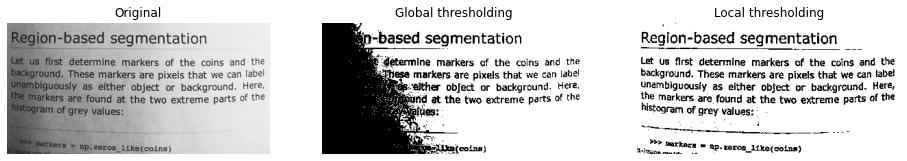

In [15]:
from skimage.filters import threshold_otsu, threshold_local


image = data.page()

global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = 35
local_thresh = threshold_local(image, block_size, offset=10)
binary_local = image > local_thresh

fig, axes = plt.subplots(ncols=3, figsize=(16, 16))
ax = axes.ravel()
plt.gray()

ax[0].imshow(image)
ax[0].set_title('Original')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')

ax[2].imshow(binary_local)
ax[2].set_title('Local thresholding')

for a in ax:
    a.axis('off')

plt.show()

Now, we show how Otsu’s threshold method can be applied locally. For each pixel, an “optimal” threshold is determined by maximizing the variance between two classes of pixels of the local neighborhood defined by a structuring element.

The example compares the local threshold with the global threshold.

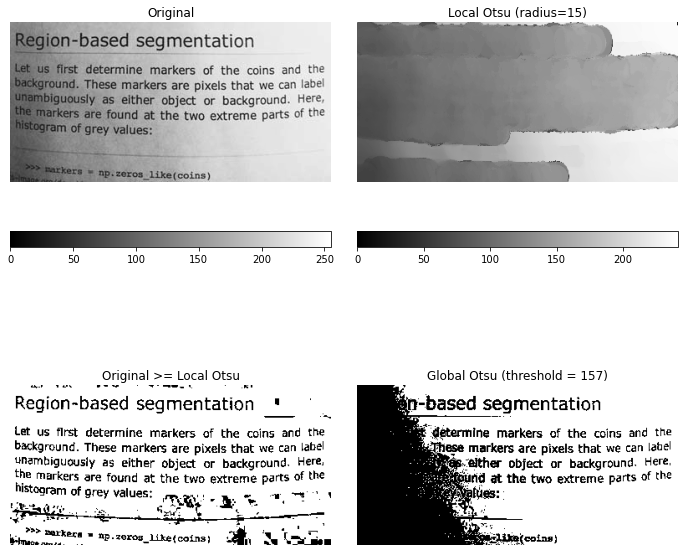

In [20]:
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte


img = img_as_ubyte(data.page())

radius = 15
selem = disk(radius)

local_otsu = rank.otsu(img, selem)
threshold_global_otsu = threshold_otsu(img)
global_otsu = img >= threshold_global_otsu

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()
plt.tight_layout()

fig.colorbar(ax[0].imshow(img, cmap=plt.cm.gray),
             ax=ax[0], orientation='horizontal')
ax[0].set_title('Original')
ax[0].axis('off')

fig.colorbar(ax[1].imshow(local_otsu, cmap=plt.cm.gray),
             ax=ax[1], orientation='horizontal')
ax[1].set_title('Local Otsu (radius=%d)' % radius)
ax[1].axis('off')

ax[2].imshow(img >= local_otsu, cmap=plt.cm.gray)
ax[2].set_title('Original >= Local Otsu' % threshold_global_otsu)
ax[2].axis('off')

ax[3].imshow(global_otsu, cmap=plt.cm.gray)
ax[3].set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
ax[3].axis('off')

plt.show()

### 4. Multi-Otsu Thresholding

The multi-Otsu threshold is a thresholding algorithm that is used to separate the pixels of an input image into several different classes, each one obtained according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired classes. The default number of classes is 3: for obtaining three classes, the algorithm returns two threshold values. They are represented by a red line in the histogram below.

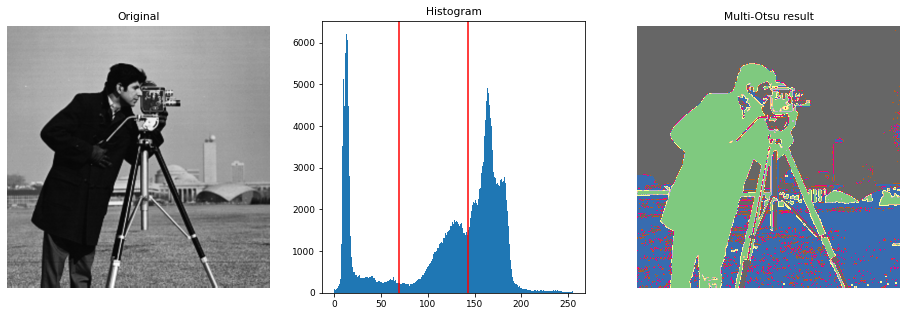

In [22]:
import matplotlib
from skimage.filters import threshold_multiotsu

# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

### 5. Active Contour Model

The active contour model is a method to fit open or closed splines to lines or edges in an image. It works by minimising an energy that is in part defined by the image and part by the spline’s shape: length and smoothness. The minimization is done implicitly in the shape energy and explicitly in the image energy.

In the following two examples the active contour model is used (1) to segment the face of a person from the rest of an image by fitting a closed curve to the edges of the face and (2) to find the darkest curve between two fixed points while obeying smoothness considerations. Typically it is a good idea to smooth images a bit before analyzing, as done in the following examples.

We initialize a circle around the astronaut’s face and use the default boundary condition boundary_condition='periodic' to fit a closed curve. The default parameters w_line=0, w_edge=1 will make the curve search towards edges, such as the boundaries of the face.

<ipython-input-23-68d5e9db953f>:17: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = active_contour(gaussian(img, 3),


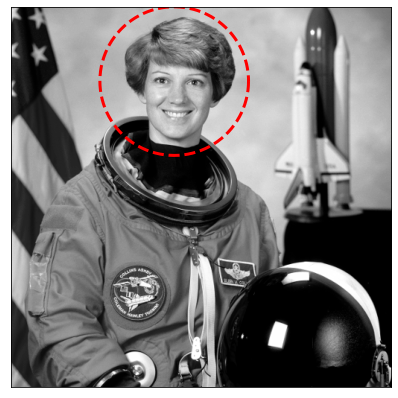

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = data.astronaut()
img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

Here we initialize a straight line between two points, (5, 136) and (424, 50), and require that the spline has its end points there by giving the boundary condition boundary_condition=’fixed’. We furthermore make the algorithm search for dark lines by giving a negative w_line value.

<ipython-input-24-3df2e0c801e1>:7: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = active_contour(gaussian(img, 1), init, boundary_condition='fixed',


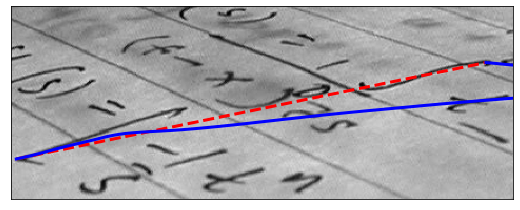

In [24]:
img = data.text()

r = np.linspace(136, 50, 100)
c = np.linspace(5, 424, 100)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 1), init, boundary_condition='fixed',
                       alpha=0.1, beta=1.0, w_line=-5, w_edge=0, gamma=0.1)

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()